

# Real Estate Prices

**Objective**: Estimate property prices
 * Identify aspects that contribute to the pricing of properties
 * Understand which aspect is more relevant and has the greatest influence on property prices
 * Price a new property

Simplified and inspired dataset from [Daft.ie](https://www.daft.ie/)

![](https://i.imgur.com/A8X79yq.jpeg)



In [62]:
import pandas as pd

In [63]:
#Lendo data_
data_ = pd.read_csv("House_Listing_2_WithIDs.csv")
data_['Price'] = data_['Price']/1000
#data_ = data_.query("Price <= 2000 & Price > 200")
data_['Area'] = data_['m²']

In [64]:
data_original = data_

In [65]:
data_original

,Price,ID_Ber,Bed,Bath,m²,ID_Type,ID_Location_Number,Type,Region,Location_,Ber,Region_ID,Area
0,845.0,1,4,2,155,1,1,Semi-D,Co. Dublin,Co. Dublin - Stillorgan,ber/D2,3,155
1,1295.0,2,4,3,173,2,2,Detached,Co. Dublin,Co. Dublin - Mount Merrion,ber/B3,3,173
2,850.0,3,3,2,140,3,3,Apartment,South,Dublin 2,ber/B2,2,140
3,795.0,4,3,1,101,1,1,Semi-D,Co. Dublin,Co. Dublin - Stillorgan,ber/C3,3,101
4,1950.0,5,4,3,236,2,4,Detached,Co. Dublin,Co. Dublin - Blackrock,ber/SI_666,3,236
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789,795.0,7,4,2,130,2,21,Detached,South,Dublin 6,ber/C2,2,130
2790,950.0,8,2,3,113,6,53,Terrace,North,Dublin 1,ber/G,1,113
2791,895.0,4,3,2,154,1,7,Semi-D,South,Dublin 14,ber/C3,2,154
2792,1500.0,7,4,3,234,2,7,Detached,South,Dublin 14,ber/C2,2,234


In [66]:
#Quais fatores coletados?

data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2794 entries, 0 to 2793
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               2794 non-null   float64
 1   ID_Ber              2794 non-null   int64  
 2   Bed                 2794 non-null   int64  
 3   Bath                2794 non-null   int64  
 4   m²                  2794 non-null   int64  
 5   ID_Type             2794 non-null   int64  
 6   ID_Location_Number  2794 non-null   int64  
 7   Type                2794 non-null   object 
 8   Region              2794 non-null   object 
 9   Location_           2794 non-null   object 
 10  Ber                 2794 non-null   object 
 11  Region_ID           2794 non-null   int64  
 12  Area                2794 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 283.9+ KB


In [67]:
data_ = data_[['Price','ID_Ber','Bed','Bath','Area','ID_Type','ID_Location_Number','Region_ID']]


In [68]:
data_

,Price,ID_Ber,Bed,Bath,Area,ID_Type,ID_Location_Number,Region_ID
0,845.0,1,4,2,155,1,1,3
1,1295.0,2,4,3,173,2,2,3
2,850.0,3,3,2,140,3,3,2
3,795.0,4,3,1,101,1,1,3
4,1950.0,5,4,3,236,2,4,3
...,...,...,...,...,...,...,...,...
2789,795.0,7,4,2,130,2,21,2
2790,950.0,8,2,3,113,6,53,1
2791,895.0,4,3,2,154,1,7,2
2792,1500.0,7,4,3,234,2,7,2



## Correlation

What factors are related to house prices? What is the nature of this relationship?

Pearson's Correlation Coefficient allows us to measure the linear relationship between variables, offering a scale that ranges from -1 to 1, which we interpret according to its intensity and direction:

* **-1**: Perfect positive correlation: as one variable increases, the other also increases.
* **0**: No linear relationship between the variables.
* **1**: Indicates a perfect negative correlation: as one variable increases, the other decreases.



In [69]:
# Correlação
corr = data_.corr()

In [70]:
corr['Price']

Price                 1.000000
ID_Ber               -0.043541
Bed                   0.611274
Bath                  0.555964
Area                  0.370205
ID_Type              -0.214532
ID_Location_Number   -0.140822
Region_ID             0.187550
Name: Price, dtype: float64


This **corr** (short for **correlation**) tells us **how different things (like the number of bedrooms, bathrooms, etc.) relate to the house price**. A **correlation** can be:

- **1.0**: That means two things are perfectly connected. If one goes up, the other goes up exactly the same way.
- **0.0**: That means two things are not related at all.
- **-1.0**: That means two things move in opposite directions. If one goes up, the other goes down.

So, here's what each number means for the **Price** of the house:

1. **Price = 1.000000**:  
   - This makes sense because we’re comparing **Price** with itself, so it’s **perfectly connected**.

2. **ID_Ber = -0.043541**:  
   - This is very close to **0**, which means **ID_Ber** (maybe a code for something like energy rating) **is not really connected** to the house price.

3. **Bed = 0.611274**:  
   - This is a **positive number** (above 0.5), so it means that **more bedrooms** are connected to **higher house prices**. The more bedrooms a house has, the more likely the price is to go up, but it's not a perfect connection.

4. **Bath = 0.555964**:  
   - Similar to **Bed**, this is also a **positive number**. More **bathrooms** tend to be linked to **higher prices**.

5. **Area = 0.370205**:  
   - This is a **positive, but smaller** number. It means **bigger houses (in square meters)** usually have higher prices, but the connection is not as strong as with bedrooms or bathrooms.

6. **ID_Type = -0.214532**:  
   - This is a **negative number**, which means the house **type** is related to **lower prices**. Maybe certain house types (like apartments or smaller homes) tend to have **lower prices**.

7. **ID_Location_Number = -0.140822**:  
   - This is a **small negative number**, meaning the **location ID** (which might be a number representing different areas) is **slightly related to lower prices**, but it’s not a big effect.

### In Simple Terms:
- **Bedrooms and bathrooms** make house prices **go up**.
- **House type** and maybe **location** might make prices **go down** a little.
- The **size of the house** matters, but not as much as the number of bedrooms or bathrooms.



## Relating variables

In [71]:
# importando as visualizações
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Text(0, 0.5, 'Preço de venda')

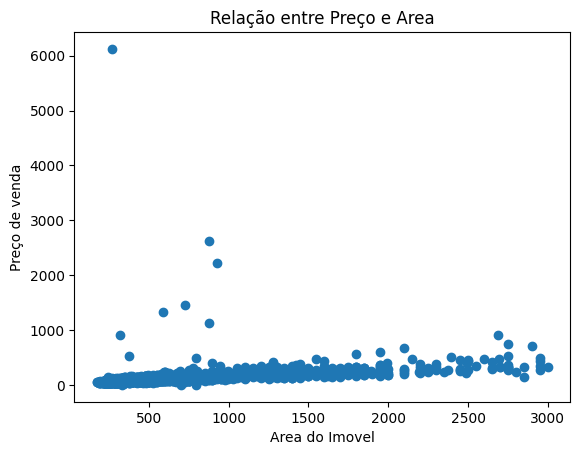

In [72]:
# Como é a relação entre área construida e o preço do imóvel?
plt.scatter(data_['Price'], data_['Area'])
plt.title("Relação entre Preço e Area")
plt.xlabel("Area do Imovel")
plt.ylabel("Preço de venda")


Text(0, 0.5, 'Preço de venda')

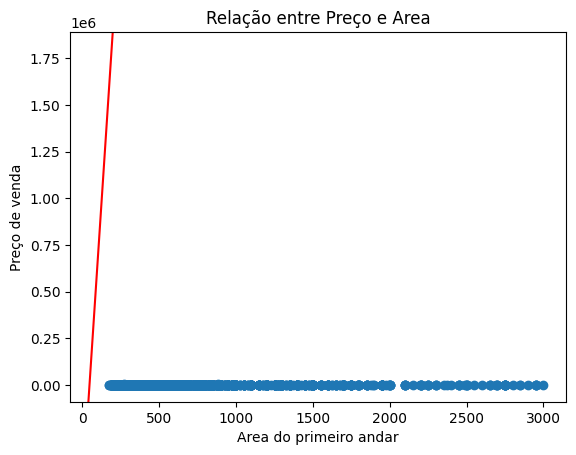

In [73]:
# Aparentemente quanto maior a área do primeiro andar, maior o preço da casa.
# E se quisermos traçar uma linha que melhor representa esse comportamento?
plt.scatter(data_['Price'], data_['Area'])
plt.axline(xy1 = (66, 250000),xy2 = (190, 1800000), color = "red" )
plt.title("Relação entre Preço e Area")
plt.xlabel("Area do primeiro andar")
plt.ylabel("Preço de venda")



## The Best Line

In [74]:
# Qual a reta que melhor se adequa a relação?
px.scatter(data_, x = 'Area', y = 'Price', trendline_color_override="red", trendline = 'ols' )

# 2. Explaning the Line
Ajustamos uma reta entre o $m^2$ do primeiro andar e o preço da casa. Queremos explicar o preço da casa a partir do seu tamanho, por isso dizemos que:

* Variável explicativa/independente: Área do primeiro andar

* Variável resposta/dependente: Preço da casa

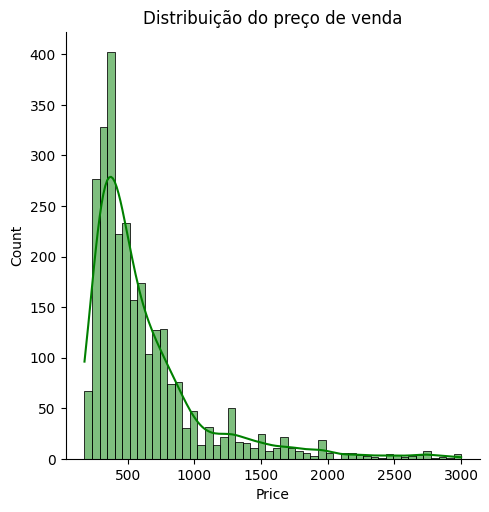

In [75]:
#Quem é nossa variável resposta?

sns.displot(data_['Price'], kde=True, color='green')
plt.title('Distribuição do preço de venda')
plt.show()


### Splitting into Training and Testing

The **training** set is used to fit the model, while the **testing** set is used to evaluate its performance in predicting house prices that were not seen during training, which helps in model generalization.


In [76]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [77]:
# Definindo y e X
y = data_['Price']
X = data_.drop(columns = 'Price')

In [78]:
#Aplicando o split do y e X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 230)

#y_binned = pd.cut(y, bins=10, labels=False)
#loc_binned = pd.cut(X['ID_Location_Number'], bins=5, labels=False)


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,stratify=y_binned,random_state= 230)

In [79]:
#data_ de treino para usar a fórmula

df_train = pd.DataFrame(data= X_train )
df_train['Price'] = y_train

In [80]:
df_train

,ID_Ber,Bed,Bath,Area,ID_Type,ID_Location_Number,Region_ID,Price
114,11,5,4,304,2,14,2,1150.0
892,10,3,2,86,1,45,2,320.0
2264,13,3,1,115,6,12,1,575.0
1209,8,2,1,51,5,3,2,335.0
960,7,3,1,77,6,41,2,340.0
...,...,...,...,...,...,...,...,...
271,4,3,2,74,1,45,2,289.0
2771,13,2,1,76,1,13,2,400.0
560,13,4,2,182,1,38,2,1295.0
768,12,4,4,149,1,52,3,775.0


In [81]:
# import ols
from statsmodels.formula.api import ols

In [82]:
# ajustando o primeiro modelo
modelo_0 = ols("Price ~ Area", data = df_train ).fit()

'Price  ~ Area' is the formula that specifies the relationship:
preco_de_venda: This is the dependent variable (the thing you're trying to predict), which is the sale price of the house.
area_primeiro_andar: This is the independent variable (the thing you're using to predict the price), which is the first floor area of the house.
The ~ symbol indicates that you're modeling preco_de_venda as a function of area_primeiro_andar.



## Analyzing the Coefficients

(intensity, direction, and significance)



In [83]:
# visualizando os parametros

modelo_0.params

Intercept    523.708241
Area           0.934416
dtype: float64

In [84]:
# o resumo do nosso modelo
print(modelo_0.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     257.4
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           1.61e-54
Time:                        20:16:23   Log-Likelihood:                -14633.
No. Observations:                1955   AIC:                         2.927e+04
Df Residuals:                    1953   BIC:                         2.928e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    523.7082     12.049     43.463      0.0


* The **intercept** is the expected value of the house price when all other variables are zero. In this case, when all other variables (like the first-floor area) are zero, the expected house price is 523.000,00. We don't always have a practical interpretation of this number.

* The **individual effect** of the area is 934,00. This indicates that for each additional unit of area added, the house price is expected to increase by an average of 934,00.



<img src="https://i.imgur.com/7Cm4Cot.png" width="500"/>


Regression result simple terms

### 1. **Model Overview (Top Section)**:
This section gives an overview of your regression model.

- **Dep. Variable**: **Price** – This means you are trying to predict **Price** (the dependent variable).
- **R-squared: 0.116** – This tells us how well the model explains the variability in the data. In simple terms, this model explains about **11.6%** of the variation in house prices. This is pretty low, meaning the model doesn’t capture all the factors that influence house prices. Other factors could be missing.
- **Adj. R-squared: 0.116** – This adjusts the R-squared for the number of variables in the model. Since you only have one variable (area), it's basically the same as R-squared.
- **F-statistic: 257.4** – This tells us if the model as a whole is statistically significant. A high F-statistic with a low p-value (like we have here) means that **at least one variable (Area) is useful** for predicting price.
- **Prob (F-statistic): 1.61e-54** – This is the p-value for the F-statistic. It's extremely small (close to 0), meaning the model is statistically significant overall. This means that **Area has a significant effect on Price**.

### 2. **Coefficients (Middle Section)**:
This part tells us about the specific relationship between **Area** (first-floor area) and **Price**.

- **Intercept**: **523.7082** – This is the predicted house price when the first-floor area is 0. It doesn’t make much sense to think about a house with no area, but mathematically, this is the **starting point** of the line. So if the area were 0, the model predicts the price would be about **$523,708**.
  
- **Area**: **0.9344** – This is the most important number. It means that for each **additional square meter of area**, the house price goes up by about **$934.4**. So if a house had 10 extra square meters, the price would increase by **$9,344**.

- **P>|t|** for Area: **0.000** – This is the p-value for the **Area** variable. Since it's so small (much smaller than 0.05), it means the effect of area on price is **statistically significant**. In simple terms, the relationship between house size and price is **real** and not just due to random chance.

- **Confidence Interval [0.025, 0.975]**: The model is 95% confident that the true effect of area is between **$820** and **$1,049** per square meter. So, it’s very likely that each extra square meter increases the price within that range.

### 3. **Diagnostic Stats (Bottom Section)**:
These are extra tests to check if the model is good and if it meets the assumptions.

- **Durbin-Watson: 2.044** – This tests if there’s autocorrelation (i.e., patterns in the residuals/errors). A value close to **2** is good, meaning there’s probably no autocorrelation.
  
- **Omnibus, Prob(Omnibus), Jarque-Bera (JB), Prob(JB)**: These test if the residuals (errors) are normally distributed. Since **Prob(Omnibus)** and **Prob(JB)** are both very small (close to 0), it suggests that the residuals might **not** be perfectly normal.

- **Skew and Kurtosis**: These give more information about the shape of the residuals (how skewed or peaked they are). A skew of **0.496** means there’s a slight asymmetry, but it’s not extreme.

### Summary of Results in Simple Terms:
- The model says that **bigger houses (larger first-floor area) tend to have higher prices**. For every extra square meter of area, the price increases by about **$934**.
- The relationship between house area and price is **real** (statistically significant) and not just due to chance.
- The model only explains **11.6%** of the variation in house prices, which means other factors (like location, number of bedrooms, etc.) might also be important in predicting price.

 

In [85]:
# observando o R²
modelo_0.rsquared

np.float64(0.11646771036476755)


## Understanding the Residual
![](https://i.imgur.com/CJMdXpf.png)

In [86]:
# Quem são os residuos
modelo_0.resid

114     342.229367
892    -284.067997
2264    -56.166054
1209   -236.363445
960    -255.658255
           ...    
271    -303.855008
2771   -194.723839
560     601.228090
768     112.063810
1792   -275.280986
Length: 1955, dtype: float64

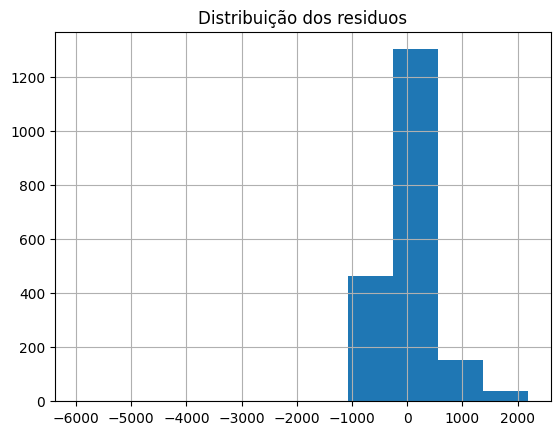

In [87]:
# Como eles estão distribuidos
modelo_0.resid.hist()
plt.title("Distribuição dos residuos")
plt.show()




## Obtendo o R² da previsão

In [88]:
# definindo o Y previsto
y_predict = modelo_0.predict(X_test)

In [89]:
# importando o r2_score
from sklearn.metrics import r2_score

In [90]:
# printando o r²
print("R²: ", r2_score(y_test,y_predict ))

R²:  0.18146827915273045


### 1. **`modelo_0.resid`** – Residuals:
- **Residuals** are the differences between the **actual values** and the **predicted values** from your regression model.
- When you fit a model, it tries to predict house prices based on the area, but it won't get every house price exactly right. The **residuals** show how much the model was **off** for each prediction (whether it predicted too high or too low).

So, **`modelo_0.resid`** gives you the list of all these differences for the model predictions versus the actual house prices.

---

### 2. **Plotting the Residuals**:
```python
modelo_0.resid.hist()
plt.title("Distribuição dos residuos")
plt.show()
```
This part shows a **histogram** (a type of bar graph) of the residuals to see how they are distributed.

- The goal is to check if the residuals are **normally distributed** (like a bell curve), which is one of the assumptions of linear regression.
- If the residuals are normally distributed, it means the model's errors are spread out evenly, which is a good sign that the model is doing a decent job.

### 3. **`y_predict = modelo_0.predict(X_test)` – Making Predictions**:
- Here, you are using the trained model (`modelo_0`) to **predict house prices** for the **X_test** data.
- **`X_test`** is likely your **test data**, which contains the **area values** that the model uses to predict the house prices.

So, **`y_predict`** contains the predicted house prices for the test data.

---

### 4. **Calculating R² (R-squared)**:
```python
from sklearn.metrics import r2_score
print("R²: ", r2_score(y_test, y_predict))
```

- **R² (R-squared)** is a number that tells you **how well your model is doing**.
  - It ranges from **0 to 1**:
    - **1** means the model predicts perfectly (which almost never happens).
    - **0** means the model doesn’t predict any better than guessing the average price for everything.
  
- **`r2_score(y_test, y_predict)`** calculates the R² score by comparing the **predicted prices** (`y_predict`) to the **actual prices** (`y_test`).

In your case, the R² is **0.181**, or about **18.1%**.

### What does this R² of 0.181 mean?
- This means that **only 18.1% of the variation in house prices** is explained by your model based on the **area** of the house.
- In simple terms, your model doesn’t do a great job at predicting house prices because it’s **missing important factors** that affect price (like location, number of bedrooms, etc.).
- The model is **better than guessing**, but it's not a strong model yet, which makes sense because you're only using **area** to predict price, and many other things also affect house prices.

---

### Summary:
1. **Residuals** show how much the model's predictions were off compared to the actual prices.
2. The histogram of residuals helps check if the model's errors are evenly spread out.
3. The **R²** value of **0.181** means the model explains only **18.1%** of the variation in house prices, so it’s not very strong—other factors besides area likely influence the price.

Looking at the histogram you provided for the **residuals** (the differences between the actual and predicted house prices), we can make a few observations:

### What We See:
- The residuals are mostly centered around **0**, but there is a **rightward skew** (with some larger positive residuals) as well as some **negative residuals**.
- Most of the residuals are between **-1000** and **1000**, meaning the model's predictions are often **off by $1000** (either too high or too low).
- There are some extreme values where the model's predictions were off by more than **$2000**, but these are less frequent.

### What This Tells Us:
1. **Right Skew (Positive Residuals)**: The model **underestimates** the price for some houses (positive residuals, where actual prices are higher than predicted). This suggests that for a certain subset of houses, the model predicts lower prices than it should.
   
2. **Negative Residuals**: The model **overestimates** the price for some houses (negative residuals, where actual prices are lower than predicted). This means that for some houses, the model predicts higher prices than the actual ones.

3. **Non-Normal Distribution**: Ideally, we want the residuals to form a bell curve (normal distribution) around zero. Here, the histogram shows that the residuals are **skewed**, indicating that the model isn't perfect at predicting prices. The model might be missing important factors that cause some houses to have much higher or lower prices than predicted.

### What Could Be Happening:
- The fact that the residuals aren’t evenly spread or centered perfectly around 0 suggests that the **relationship between first-floor area and price** isn’t the only thing affecting house prices. Other factors, like the **location** of the house, **number of bedrooms**, or **quality** of the house, could also be important but are not included in the model.

### Next Steps:
- You might want to add more features to your model (e.g., bedrooms, location) to improve its accuracy.
- You could also check the normality of residuals (e.g., using a Q-Q plot) to confirm whether they follow a normal distribution.

### Conclusion:
- Your model is **sometimes off by around $1000** or more in its predictions, and it looks like it's not capturing all the factors that influence house prices.
- Adding more variables to the model could help reduce the skew in the residuals and improve the predictions.




## Adding more variables

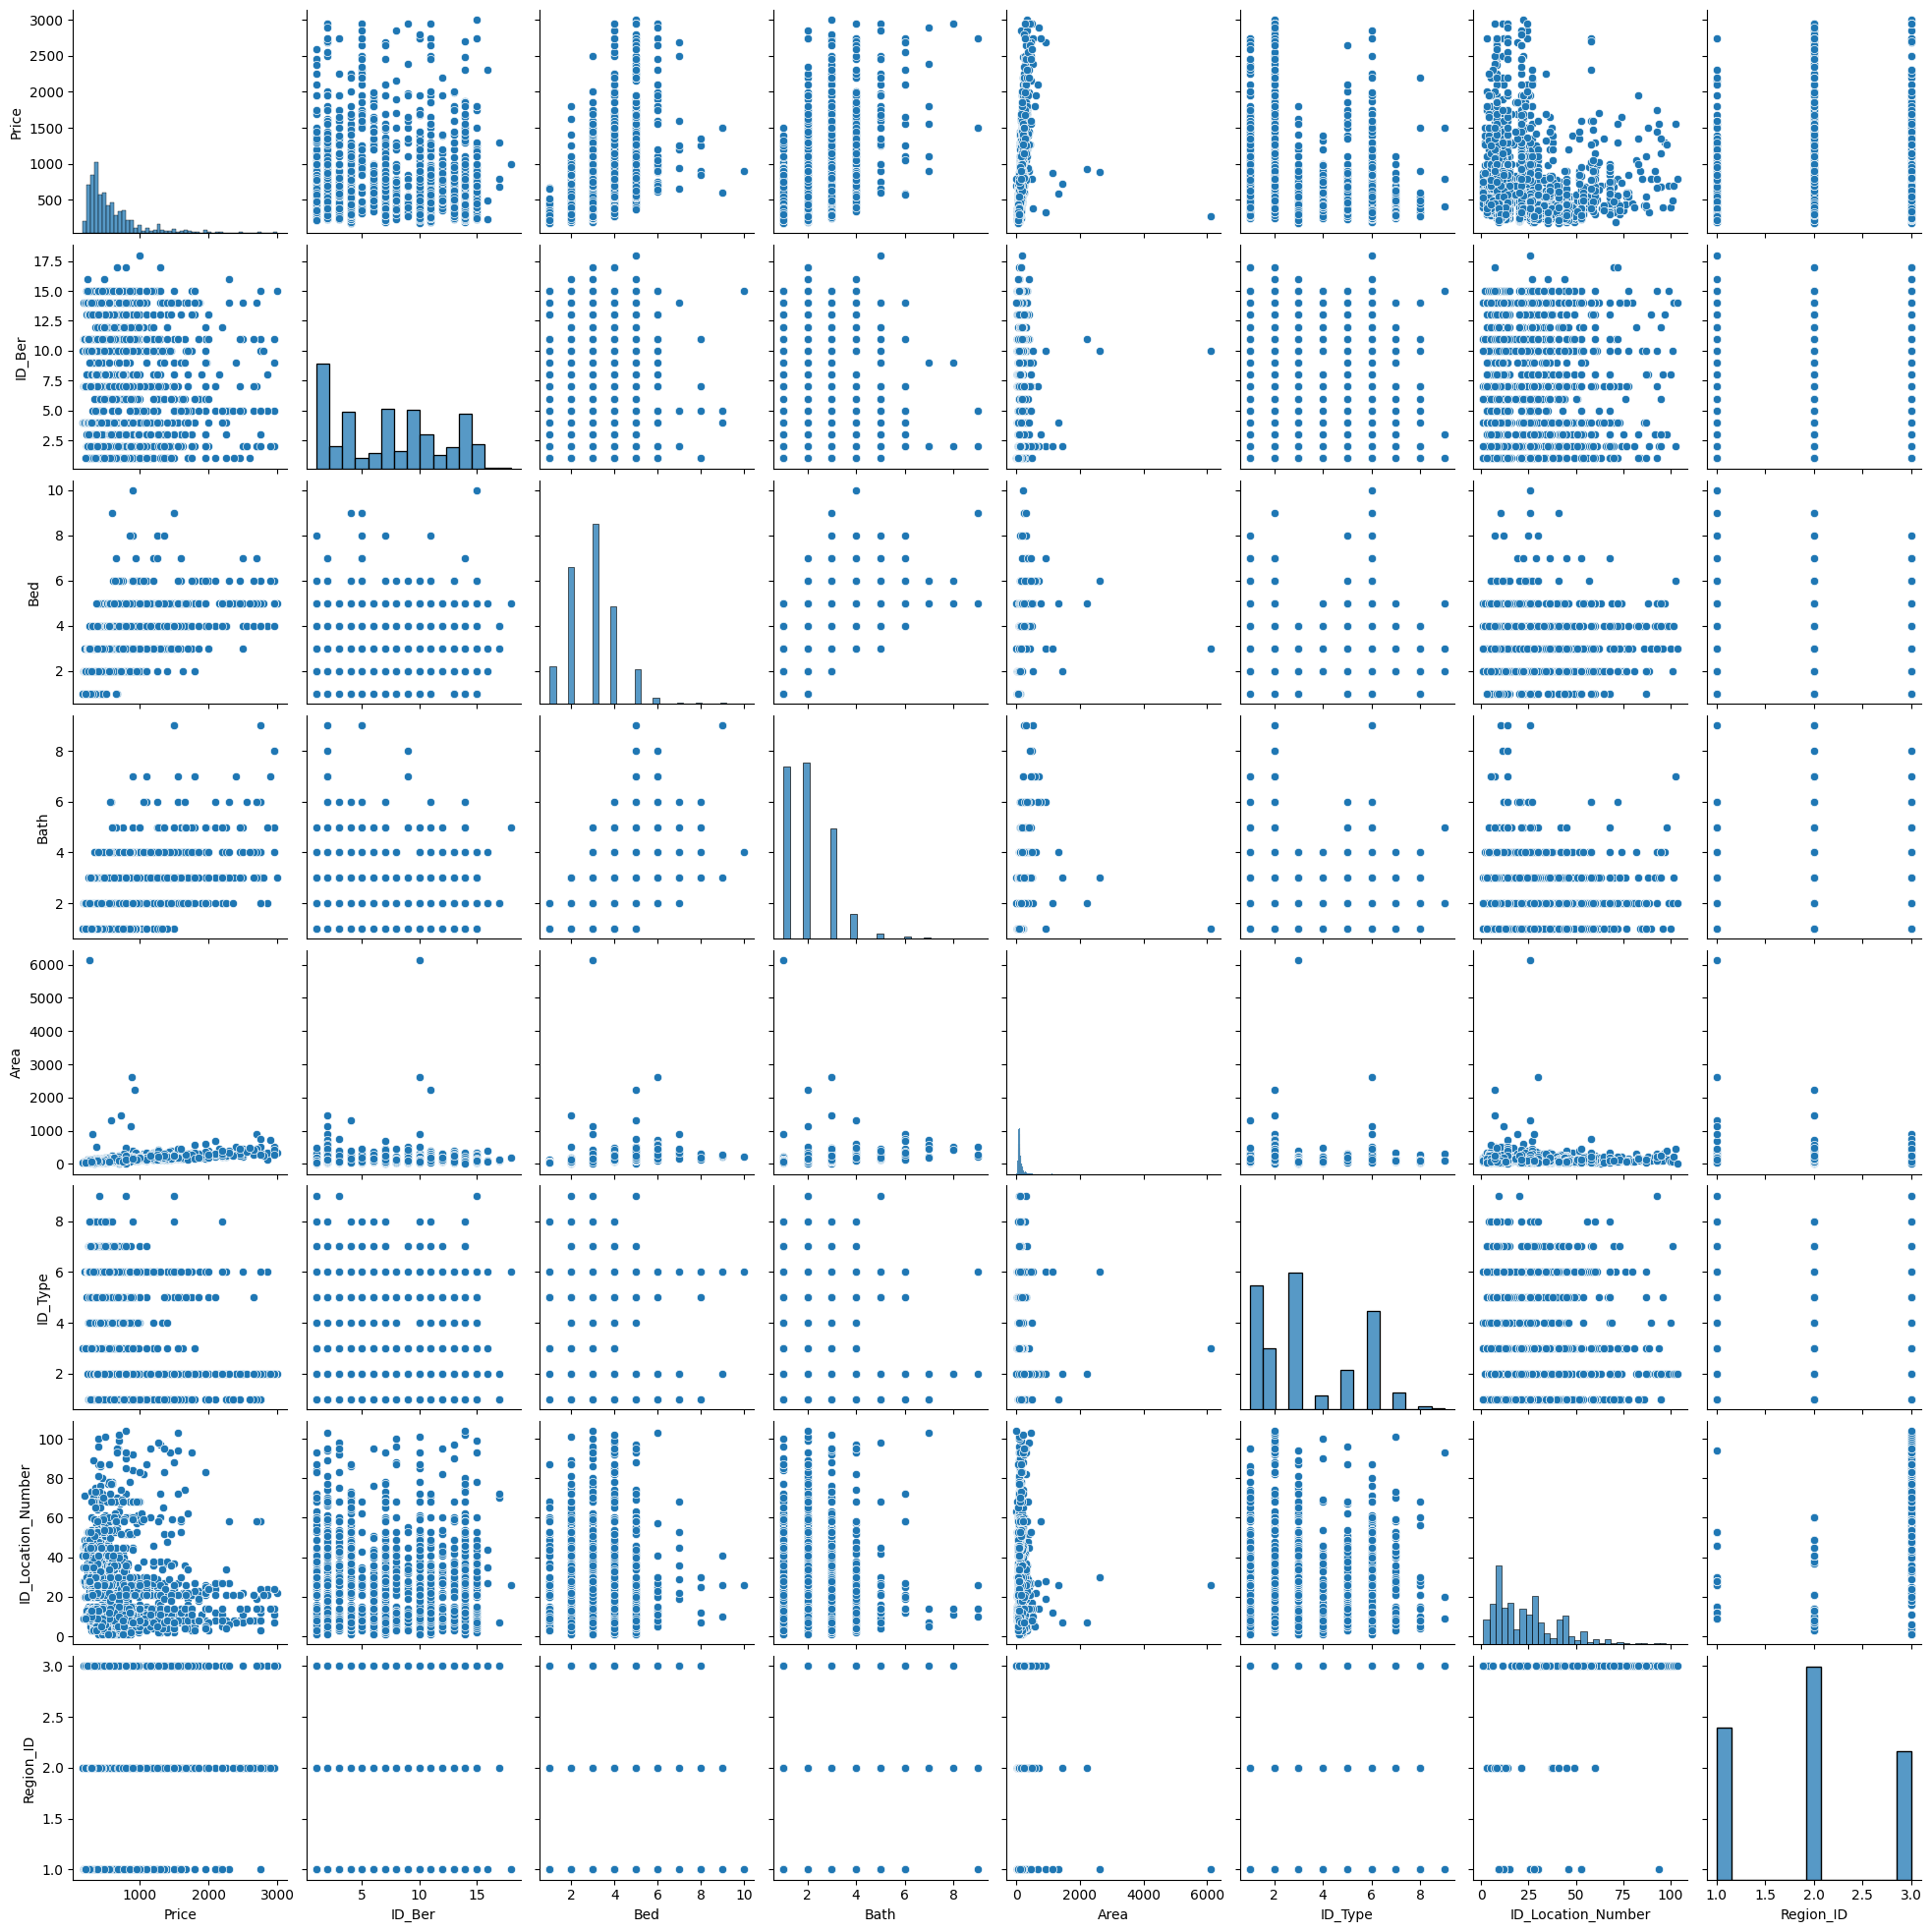

In [91]:
# quais outras características poderiam explicar o preço dos imóveis?
sns.pairplot(data_)

In [92]:
data_.columns

Index(['Price', 'ID_Ber', 'Bed', 'Bath', 'Area', 'ID_Type',
       'ID_Location_Number', 'Region_ID'],
      dtype='object')

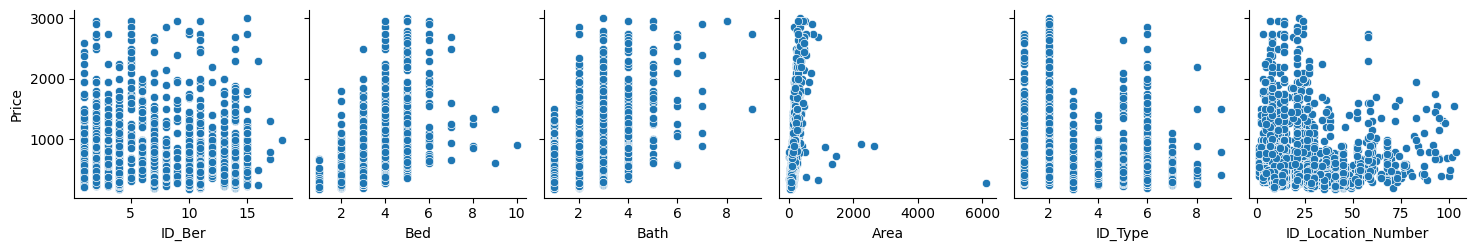

In [93]:
#Vamos olhar apenas com y_vars='preco_de_venda'
sns.pairplot(data_, y_vars = 'Price', x_vars = ['ID_Ber', 'Bed', 'Bath', 'Area', 'ID_Type','ID_Location_Number'] )


In [94]:
# importando a api do statsmodels
import statsmodels.api as sm

In [95]:
# adicionando o constante
X_train = sm.add_constant(X_train)


In [96]:
X_train.head()

,const,ID_Ber,Bed,Bath,Area,ID_Type,ID_Location_Number,Region_ID
114,1.0,11,5,4,304,2,14,2
892,1.0,10,3,2,86,1,45,2
2264,1.0,13,3,1,115,6,12,1
1209,1.0,8,2,1,51,5,3,2
960,1.0,7,3,1,77,6,41,2


In [97]:
X_train.columns

Index(['const', 'ID_Ber', 'Bed', 'Bath', 'Area', 'ID_Type',
       'ID_Location_Number', 'Region_ID'],
      dtype='object')

In [98]:
# Criando o modelo de regressão (sem fómula): saturado
modelo_1 = sm.OLS(y_train,
                  X_train[['ID_Ber', 'Bed', 'Bath', 'Area', 'ID_Type','Region_ID']]).fit()

In [99]:
# Modelo sem a BER
modelo_2 = sm.OLS(y_train,
                  X_train[['Bed', 'Bath', 'Area', 'ID_Type','Region_ID']]).fit()

In [100]:
# Modelo sem informações 'ID_Location_Number'
modelo_3 = sm.OLS(y_train,
                  X_train[['Bed', 'Bath', 'Area', 'ID_Type','ID_Ber']]).fit()

In [101]:
modelo_4 = sm.OLS(y_train,
                  X_train[['Bed', 'Bath', 'Region_ID']]).fit()

In [102]:
# Resumo do modelo 1
print(modelo_1.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.819
Model:                            OLS   Adj. R-squared (uncentered):              0.818
Method:                 Least Squares   F-statistic:                              1470.
Date:                Thu, 24 Oct 2024   Prob (F-statistic):                        0.00
Time:                        20:16:40   Log-Likelihood:                         -14135.
No. Observations:                1955   AIC:                                  2.828e+04
Df Residuals:                    1949   BIC:                                  2.831e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

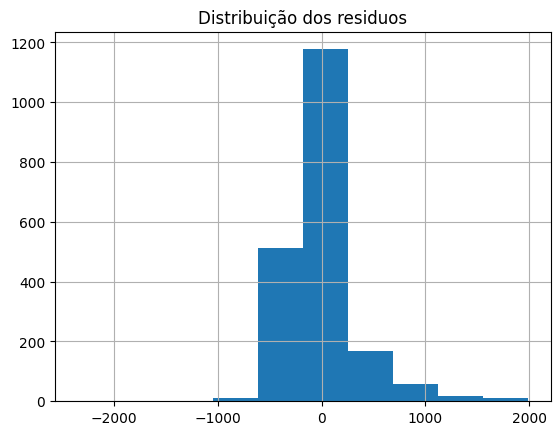

In [103]:
# Como eles estão distribuidos
modelo_1.resid.hist()
plt.title("Distribuição dos residuos")
plt.show()


In [104]:
# Resumo do modelo 2
print(modelo_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.819
Model:                            OLS   Adj. R-squared (uncentered):              0.818
Method:                 Least Squares   F-statistic:                              1762.
Date:                Thu, 24 Oct 2024   Prob (F-statistic):                        0.00
Time:                        20:16:41   Log-Likelihood:                         -14136.
No. Observations:                1955   AIC:                                  2.828e+04
Df Residuals:                    1950   BIC:                                  2.831e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [105]:
# Resumo do modelo 3
print(modelo_3.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.817
Model:                            OLS   Adj. R-squared (uncentered):              0.817
Method:                 Least Squares   F-statistic:                              1743.
Date:                Thu, 24 Oct 2024   Prob (F-statistic):                        0.00
Time:                        20:16:41   Log-Likelihood:                         -14145.
No. Observations:                1955   AIC:                                  2.830e+04
Df Residuals:                    1950   BIC:                                  2.833e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [106]:
print(modelo_4.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.804
Model:                            OLS   Adj. R-squared (uncentered):              0.804
Method:                 Least Squares   F-statistic:                              2676.
Date:                Thu, 24 Oct 2024   Prob (F-statistic):                        0.00
Time:                        20:16:41   Log-Likelihood:                         -14211.
No. Observations:                1955   AIC:                                  2.843e+04
Df Residuals:                    1952   BIC:                                  2.844e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Comparing Models
What is the Best


In [107]:
print("R²")
print("Modelo 0: ", modelo_0.rsquared)
print("Modelo 1: ", modelo_1.rsquared)
print("Modelo 2: ", modelo_2.rsquared)
print("Modelo 3: ", modelo_3.rsquared)

R²
Modelo 0:  0.11646771036476755
Modelo 1:  0.8190139111266008
Modelo 2:  0.818792878038632
Modelo 3:  0.817177079212764


Explaning Model 3

### 1. **Model Overview (Top Section)**:
This section gives an overall summary of how well the model fits the data.

- **Dep. Variable (Price)**: The thing we're trying to predict is **house prices**.
- **R-squared (uncentered): 0.817**: This tells us that **81.7% of the variation** in house prices is explained by the model. This is a very **good fit** because the model explains most of the changes in house prices based on the variables.
  
- **Adj. R-squared (uncentered): 0.817**: This is just an adjusted version of R-squared, which accounts for the number of variables in the model. It's still **81.7%**, meaning the model does a good job overall.

- **F-statistic: 1743** and **Prob (F-statistic): 0.00**: This is a measure of whether the model as a whole is statistically significant. The very small p-value (0.00) tells us that the model is **statistically significant**, meaning the variables (like number of bedrooms, bathrooms, etc.) do a good job predicting house prices.

---

### 2. **Coefficients (Middle Section)**:
This part explains how each of the independent variables (like number of bedrooms, bathrooms, area, etc.) affects house prices.

- **Bed (Bedrooms)**: 
  - **coef: 144.65** – For every extra bedroom, the house price increases by about **$144,650**.
  - **P>|t|: 0.000** – This p-value is very small, meaning **bedrooms are a statistically significant factor** in determining house prices. The model is highly confident that bedrooms matter for predicting price.

- **Bath (Bathrooms)**:
  - **coef: 126.17** – For every extra bathroom, the house price increases by about **$126,170**.
  - **P>|t|: 0.000** – Bathrooms are also **statistically significant**, and they have a strong effect on house price.

- **Area**:
  - **coef: 0.3470** – For every extra square meter of area, the house price increases by **$347**. While the effect of area is smaller compared to bedrooms and bathrooms, it's still **statistically significant**.
  
- **ID_Type** (This might represent house type, like apartment, villa, etc.):
  - **coef: -26.41** – This negative number means that certain types of houses **decrease the price by about $26,410**. So, certain house types are cheaper than others.
  - **P>|t|: 0.000** – This is also **statistically significant**, meaning house type clearly affects house prices.

- **ID_Ber** (This could represent something like energy efficiency ratings):
  - **coef: -0.8962** – This number is small and negative, meaning the impact of **ID_Ber** on price is almost zero (a very small decrease of about $896).
  - **P>|t|: 0.550** – Since the p-value is large (0.550), it means that **ID_Ber is not statistically significant**. This means it doesn't have a meaningful effect on house prices in this model.

---

### 3. **Diagnostic Stats (Bottom Section)**:
These are tests that help check if the model assumptions hold.

- **Omnibus and Prob(Omnibus)**: This tests whether the residuals (errors) are normally distributed. The **p-value of 0.00** suggests that the residuals are **not normally distributed**, which might indicate the model has some issues.
  
- **Durbin-Watson: 1.961**: This checks for autocorrelation in the residuals. A value near **2** is good and suggests there's no serious autocorrelation problem.

- **Jarque-Bera (JB)** and **Prob(JB)**: Similar to Omnibus, this also tests if the residuals follow a normal distribution. Since the **p-value is 0.00**, it confirms that the residuals are **not perfectly normal**, which is a common issue with real-world data but something to keep in mind.

- **Skew (1.478)** and **Kurtosis (9.533)**: 
  - **Skew** tells us the distribution of residuals is **right-skewed** (the model tends to underpredict prices for some houses).
  - **Kurtosis** shows the distribution has **fat tails** (there are a few extreme errors).

---

### Summary of Results in Simple Terms:
- The model explains **81.7%** of the variation in house prices, which is very good.
- **Bedrooms and bathrooms** have the biggest impact on house prices, with prices increasing by around **$144,650** per bedroom and **$126,170** per bathroom.
- **House area** also affects prices, with each additional square meter adding **$347**.
- **Certain house types** reduce prices by about **$26,410**.
- The variable **ID_Ber** (which might represent energy efficiency or something similar) doesn’t have much impact on house prices.
  
- Overall, the model is **statistically significant** and does a good job predicting house prices, but the residuals aren’t perfectly normal, meaning there may be some outliers or missing factors that could improve the model.



In [108]:
#Quantos parametros estão no modelo?
print(len(modelo_0.params))
print(len(modelo_1.params))
print(len(modelo_2.params))
print(len(modelo_3.params))

2
6
5
5


In [109]:
modelo_3.params

Bed        144.647612
Bath       126.174555
Area         0.346962
ID_Type    -26.407863
ID_Ber      -0.896186
dtype: float64


# 4. Pricing the Houses



## R²

In [110]:
X_test.columns

Index(['ID_Ber', 'Bed', 'Bath', 'Area', 'ID_Type', 'ID_Location_Number',
       'Region_ID'],
      dtype='object')

In [111]:
modelo_2.params

Bed          129.466963
Bath         120.783559
Area           0.356862
ID_Type      -31.298409
Region_ID     35.900147
dtype: float64

In [112]:
# Adicionando uma constante em X_test
X_test = sm.add_constant(X_test)

In [113]:
# Prevendo com o modelo 3
predict_1 = modelo_2.predict(X_test[['Bed', 'Bath', 'Area', 'ID_Type','Region_ID']])



In [114]:
# Qual o r² da previsão?
modelo_1.rsquared

np.float64(0.8190139111266008)

In [115]:
# Qual o R² do treino?
print("R²: ", r2_score(y_test, predict_1))

R²:  0.4190505371592518


## Pricing a House


<img src="https://i.imgur.com/e4gytI1.png" width="800"/>

In [116]:
modelo_2.params

Bed          129.466963
Bath         120.783559
Area           0.356862
ID_Type      -31.298409
Region_ID     35.900147
dtype: float64

In [119]:
ID_Type_Table = data_original[['ID_Type','Type']]
ID_Type_Table = ID_Type_Table.drop_duplicates(subset=['ID_Type'])


In [120]:
ID_Type_Table

,ID_Type,Type
0,1,Semi-D
1,2,Detached
2,3,Apartment
9,4,Bungalow
11,5,End of Terrace
13,6,Terrace
66,7,Duplex
99,8,Townhouse
988,9,House


In [ ]:
ID_Type_Table = data_original[['ID_Type','Type']]
ID_Type_Table = ID_Type_Table.drop_duplicates(subset=['ID_Type'])

In [127]:
data_original

,Price,ID_Ber,Bed,Bath,m²,ID_Type,ID_Location_Number,Type,Region,Location_,Ber,Region_ID,Area
0,845.0,1,4,2,155,1,1,Semi-D,Co. Dublin,Co. Dublin - Stillorgan,ber/D2,3,155
1,1295.0,2,4,3,173,2,2,Detached,Co. Dublin,Co. Dublin - Mount Merrion,ber/B3,3,173
2,850.0,3,3,2,140,3,3,Apartment,South,Dublin 2,ber/B2,2,140
3,795.0,4,3,1,101,1,1,Semi-D,Co. Dublin,Co. Dublin - Stillorgan,ber/C3,3,101
4,1950.0,5,4,3,236,2,4,Detached,Co. Dublin,Co. Dublin - Blackrock,ber/SI_666,3,236
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789,795.0,7,4,2,130,2,21,Detached,South,Dublin 6,ber/C2,2,130
2790,950.0,8,2,3,113,6,53,Terrace,North,Dublin 1,ber/G,1,113
2791,895.0,4,3,2,154,1,7,Semi-D,South,Dublin 14,ber/C3,2,154
2792,1500.0,7,4,3,234,2,7,Detached,South,Dublin 14,ber/C2,2,234


In [129]:
ID_Region_Table = data_original[['Region_ID','Region']]
ID_Region_Table = ID_Region_Table.drop_duplicates(subset=['Region_ID'])

In [130]:
ID_Region_Table

,Region_ID,Region
0,3,Co. Dublin
2,2,South
14,1,North


In [54]:
#Novo imovel
new_house = pd.DataFrame({ 
                             'Bed': [2],
                             'Bath': [2],
                             'Area':[70],
                             'ID_Type':[3],
                             'Region_ID':[2]
})

In [122]:
print(modelo_2.predict(new_house)[0])

503.38648353085586


In [124]:
# Qual o preço desse imóvel com o modelo 0?
modelo_0.predict(new_house['Area'])

0    589.117345
dtype: float64

In [54]:
# Qual o preço desse imóvel com o modelo 3?


503.38648353085586


## ## Pricing many House

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [55]:
# Lendo várias casas?
novas_casas = pd.read_csv("House_Listing_2_WithIDs_Testing_New_Houses.csv")
novas_casas['Price'] = novas_casas['Price']/1000
novas_casas['Area'] = novas_casas['m²']

In [56]:
novas_casas.head()

,Price,ID_Ber,Bed,Bath,m²,ID_Type,ID_Location_Number,Type,Region,Location_,Ber,Region_ID,Area
0,750.0,13,3,1,108,6,23,Terrace,Co. Dublin,Co. Dublin - Glenageary,ber/F,3,108
1,325.0,7,2,1,68,3,9,Apartment,North,Dublin 15,ber/C2,1,68
2,250.0,2,2,2,62,3,26,Apartment,North,Dublin 9,ber/B3,1,62
3,480.0,13,3,2,122,1,45,Semi-D,South,Dublin 22,ber/F,2,122
4,195.0,7,1,1,52,3,27,Apartment,North,Dublin 13,ber/C2,1,52


In [57]:
novas_casas_Prediction = novas_casas[['Bed', 'Bath', 'Area', 'ID_Type','Region_ID']]

novas_casas_real_price = novas_casas['Price']

In [58]:
# Qual o preço dessas novas casas?
prediction = modelo_2.predict(novas_casas_Prediction)

In [59]:
print("R²: ", r2_score(novas_casas_real_price, prediction))

R²:  0.6468099793511219


In [60]:
# Adicionando uma constante em X_test
novas_casas_Prediction = sm.add_constant(novas_casas_Prediction)

# 5. Model Investigation







## Multicollinearity

When two or more things you are trying to study are so similar that it is difficult to determine how much each one is influencing the result.



In [61]:
# import do VIF do statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
explicativas_1 = ['Bed', 'Bath', 'Area', 'ID_Type','Region_ID']

explicativas_2 = ['Bed', 'Bath', 'Area', 'ID_Type']

explicativas_3 = ['Bed', 'Bath', 'Area', 'Region_ID']

In [63]:
# VIF 1
vif_1 = pd.DataFrame()
vif_1['variavel'] = explicativas_1

vif_1["vif"] = [ variance_inflation_factor(X_train[explicativas_1], i ) for i in range(len(explicativas_1))]


In [64]:
vif_1

,variavel,vif
0,Bed,10.684758
1,Bath,8.047880
2,Area,1.735551
3,ID_Type,2.651477
4,Region_ID,5.508502


In [65]:
# VIF 2
vif_2 = pd.DataFrame()
vif_2['variavel'] = explicativas_2

vif_2["vif"] = [ variance_inflation_factor(X_train[explicativas_2], i ) for i in range(len(explicativas_2))]


In [66]:
vif_2

,variavel,vif
0,Bed,8.868107
1,Bath,7.872117
2,Area,1.731916
3,ID_Type,2.389303


In [67]:
# VIF 3
vif_3 = pd.DataFrame()
vif_3['variavel'] = explicativas_3

vif_3["vif"] = [ variance_inflation_factor(X_train[explicativas_3], i ) for i in range(len(explicativas_3))]


In [68]:
vif_3

,variavel,vif
0,Bed,10.485678
1,Bath,8.017780
2,Area,1.733423
3,Region_ID,4.963831


## Residual Analysis



In [69]:
# Prevendo os valores do treino X_train[explicativas_3]
y_previsto_train = modelo_2.predict(X_train[explicativas_1])

df_test = pd.DataFrame(data=X_train)


In [70]:
df_test['Real Price'] = y_train
df_test['Prediction'] =  y_previsto_train

In [71]:
df_test.to_csv('test.csv')

In [72]:
# Fazendo um scatter plot entre y_previsto e y_train

fig = px.scatter(x= y_previsto_train    , y= y_train,
                 title='Previsão X Real',
                 labels={'x':'Preço previsto','y':'Preço real'})
fig.show()

In [73]:
# Residuos
residuos = modelo_2.resid

In [74]:
# Fazendo um scatter plot entre y_previsto e y_train

fig = px.scatter(x= y_previsto_train    , y= residuos,
                 title='Previsão X Resid',
                 labels={'x':'Preço previsto','y':'Resid'})
fig.show()

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Preço da Casa - Previsão', ylabel='Resíduos'>

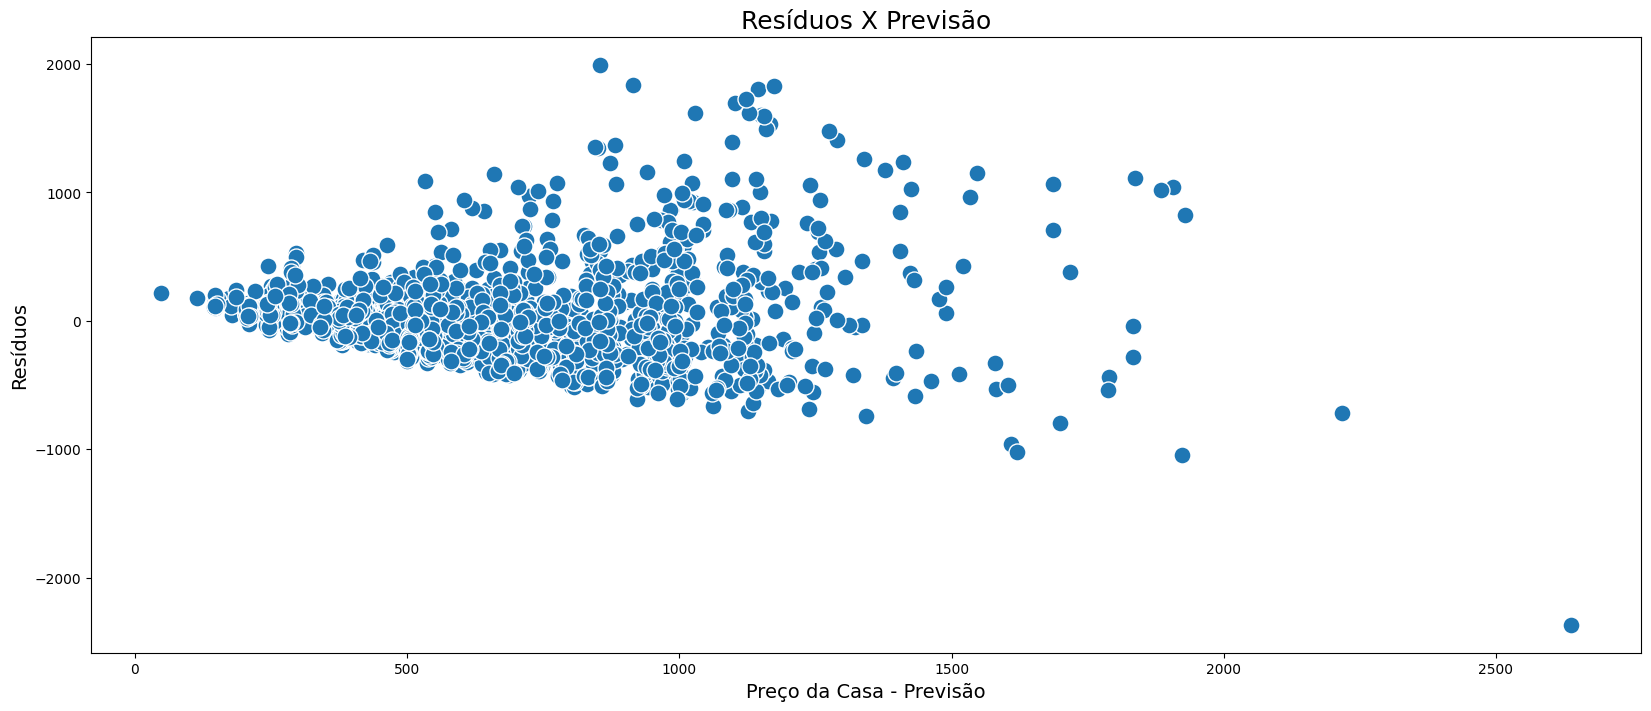

In [75]:
ax = sns.scatterplot(x= y_previsto_train   , y=residuos, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço da Casa - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax


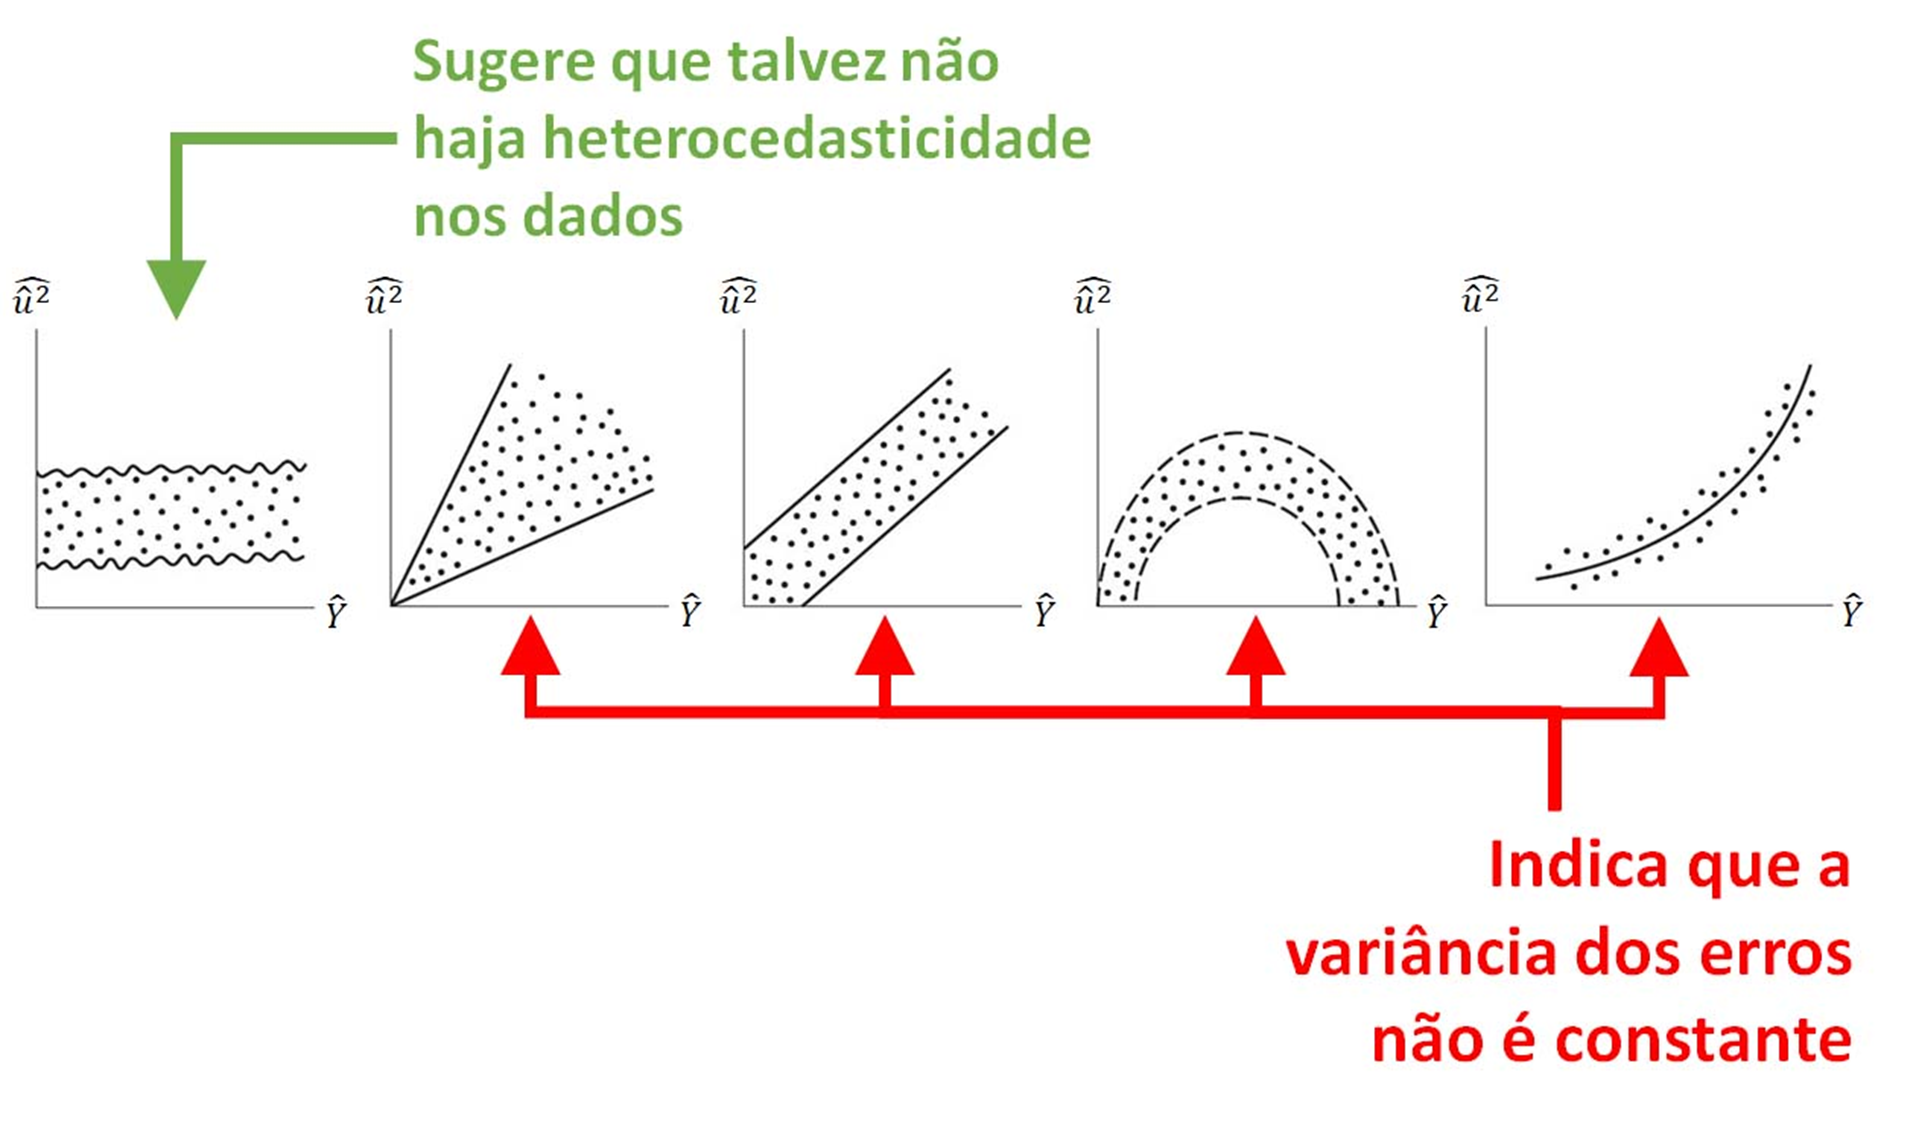


### Key Observations:

1. **Funnel Shape (Widening of Residuals)**
   - On the left side of the chart (lower predicted prices), the residuals seem more tightly clustered, indicating better predictions for lower-priced houses.
   - As you move to the right (higher predicted prices), the residuals become more spread out, which suggests that the model is less accurate in predicting higher-priced houses. This is commonly known as **heteroscedasticity**, where the variance of residuals increases with the predicted values.

2. **Bias at Higher Prices**:
   - As the price increases, there seems to be more variation and some large residuals, both positive and negative. This could indicate that the model is underfitting or overfitting certain price ranges, especially at the higher end.
   - The larger positive residuals in the higher price ranges suggest that the model is **underpredicting** the house prices for these more expensive houses. Similarly, the negative residuals might indicate some **overpredictions**.

3. **Pattern in Residuals**:
   - Ideally, residuals should be randomly scattered around zero. However, in this case, there seems to be a slight downward trend (curved) across the lower to higher predicted values, which could suggest a model misspecification (e.g., missing a non-linear relationship in the data).

### What This Means:
- **For Lower-Priced Houses**: The residuals are relatively close to zero, suggesting that the model is working well for lower-priced homes.
- **For Higher-Priced Houses**: The residuals are more spread out, indicating that the model's predictions are more variable and less reliable for higher-priced homes.

### Possible Improvements:
1. **Model Complexity**: Your model might not be capturing non-linear relationships well, which could be why higher prices show larger errors. Consider trying non-linear models such as decision trees, random forests, or gradient boosting models (e.g., XGBoost).
   
2. **Feature Engineering**: Explore more features or transformations (e.g., log transformation of price) that could help the model understand the higher-priced houses better.

3. **Check for Heteroscedasticity**: You could apply transformations (e.g., log transformation) on the target variable or use models that can handle heteroscedasticity, like generalized least squares (GLS).

4. **Regularization**: If you are using a linear model, try adding regularization (e.g., Lasso or Ridge) to improve the model's generalization, especially for more extreme values (like higher prices).

### Conclusion:
the model seems to struggle with higher-priced houses based on the widening spread of residuals as the house prices increase. Improving the model by considering non-linearity, adding features, or transforming the target variable could help address this issue.

